In [1]:
import pandas as pd
import ast
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tweets.csv')
df.shape

(11980, 33)

In [3]:
def get_hashtags(x):
    x = ast.literal_eval(x)
    tags = []
    if x['hashtags']:
        for i in x['hashtags']:
            tags.append(i['text'])
    return tags

In [4]:
hashtags = df.entities.apply(get_hashtags).to_list()

tags = [item for sublist in hashtags for item in sublist]

tuples_for_histogram = Counter(tags)#.most_common()

tuples_for_histogram

Counter({'CovidVaccine': 3170,
         'COVID19': 3948,
         'transmission': 1,
         'shedding': 1,
         'Covid': 81,
         'Rona': 2,
         'Covid19': 395,
         'Covidjab': 1,
         'Scamdemic': 3,
         'Eugenics': 2,
         'NWO': 4,
         'Depopulation': 1,
         'covishield': 7,
         'onestepcloser': 1,
         'LargestVaccineDrive': 118,
         'Covaxin': 21,
         'Covishield': 19,
         'COVIDvaccine': 124,
         'AmericanRescuePlan': 6,
         'infrastructureplan': 1,
         'BuildBackBetter': 3,
         'JohnsonandJohnson': 17,
         'vaccine': 195,
         'covid19': 218,
         'vaccines': 91,
         'america': 10,
         'variants': 7,
         'COVID_19': 8,
         'COVIDVaccinaion': 1,
         'COVID19Vaccination': 32,
         'COVIDVaccine': 514,
         'COVID19Vaccine': 85,
         'COVIDCanada': 4,
         'COVID19Canada': 2,
         'COVIDIOTS': 28,
         'VaccinesWork': 76,
         'Pfi

In [5]:
arr = []
# for tup in tuples_for_histogram:
#     arr.append(tup[1])
for tup in tuples_for_histogram:
    arr.append(tuples_for_histogram[tup])

In [6]:
# arr= [2,20,34,12,4]
n=len(arr) #Number of elements 
b=10 #number of buckets

# print("Input Array", arr) 
print("Size of array", n) 
print("Number of buckets", b)

sum_arr = [0]*(n+1) 
sqsum = [0]*(n+1) 
best_err = [[0 for m in range(b+1)] for n in range(n+1)] 
min_index = [0]*(n+1)

for i in range(1, n+1): 
    sum_arr[i]=sum_arr[i-1]+arr[i-1]
    sqsum[i]=sqsum[i-1]+(arr[i-1]*arr[i-1])

def get_squared_error(a,b): 
    s2 = sqsum[b]-sqsum[a-1] 
    s1 = sum_arr[b]-sum_arr[a-1] 
    return s2-s1**2/(b-a+1)

# print("Sum array",sum_arr) 
# print("Sq Sum array",sqsum) 
# print("best error",best_err)

min_index[1]=1

for k in range(1,b+1): 
    for i in tqdm(range (1,n+1)): 
        if(k==1): 
            best_err[i][k]=get_squared_error(1,i) 
        else: 
            best_err[i][k]=float('inf') 
            for j in range(1, i): 
                if (best_err[j][k-1]+get_squared_error(j+1,i)<best_err[i][k]): 
                    best_err[i][k] = best_err[j][k-1]+get_squared_error(j+1,i) 
                    min_index[i]=j+1

#         print("Element = ",i," Bucket = ",k,"Best error",best_err[i][k])
        #print(best_err)
    
i=b
j=n
final_buckets=[]
while i>=2:
    end_pt = j
    j = min_index[j]
    final_buckets.append([j, end_pt])
    i = i-1
    j = j-1
final_buckets.append([1, j])
final_buckets.reverse()

print("Final bucket list",final_buckets)
# print("Best error array",best_err) 
# print("Min Index array",min_index)

  0%|          | 0/3814 [00:00<?, ?it/s]

Size of array 3814
Number of buckets 10


100%|██████████| 3814/3814 [00:12<00:00, 311.98it/s]

Final bucket list [[1, 22], [23, 24], [25, 25], [26, 30], [31, 31], [32, 89], [90, 91], [92, 245], [246, 246], [247, 3814]]


Average Values for The Buckets
Squared Error of Bucket:  14703638.954545464
[1, 22]  =  225.04545454545453
Squared Error of Bucket:  8064.5
[23, 24]  =  154.5
Squared Error of Bucket:  0.0
[25, 25]  =  10.0
Squared Error of Bucket:  202165.20000000004
[26, 30]  =  112.4
Squared Error of Bucket:  0.0
[31, 31]  =  85.0
Squared Error of Bucket:  101750.4827586207
[32, 89]  =  24.482758620689655
Squared Error of Bucket:  14792.0
[90, 91]  =  89.0
Squared Error of Bucket:  100319.22727272732
[92, 245]  =  12.590909090909092
Squared Error of Bucket:  0.0
[246, 246]  =  6.0
Squared Error of Bucket:  130459.36274977843
[247, 3814]  =  2.220011210762332
Squared Error of V-Optimal Histogram:  15261189.727326589


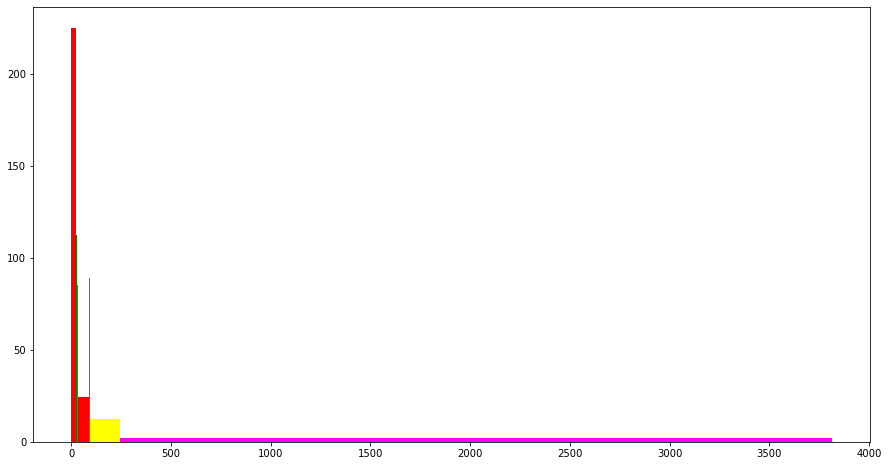

In [8]:
hr = []
binsize = []
starting = []
print("Average Values for The Buckets")
total_er = 0
for i in final_buckets:
    starting.append(i[0])
    sum1 = sum(arr[i[0]: i[1]+1])
    count = i[1]-i[0]+1
    avg = sum1/count
    bucket_error = 0

    for x in arr[i[0]: i[1]+1]:
        bucket_error = bucket_error + (x-avg)**2

    print("Squared Error of Bucket: ", bucket_error)
    total_er = total_er + bucket_error
    hr.append(avg)
    binsize.append(count)
    print(i, " = ", avg)

print("Squared Error of V-Optimal Histogram: ", total_er)

plt.figure(figsize=(15,8))
plt.bar(starting, hr, width=binsize, align='edge', color=['red', 'royalblue', 'yellow', 'green', 'fuchsia', '', 'royalblue', 'yellow', 'green', 'fuchsia'])
plt.show()